In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('housingData.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
data.shape

(20640, 10)

In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [8]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [9]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [10]:
data['total_bedrooms'].fillna(0, inplace = True)

In [11]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [12]:
data['total_bedrooms'] = data['total_bedrooms'].astype('int64')

In [13]:
data['total_bedrooms'].dtype

dtype('int64')

In [14]:
data['longitude'] = -data['longitude']

In [15]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100
20636,121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100
20637,121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300
20638,121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700


In [16]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [17]:
one_hot_encoded_data = pd.get_dummies(data['ocean_proximity'])
data.drop('ocean_proximity', axis = 1, inplace = True)
data = data.join(one_hot_encoded_data)

In [18]:
data.rename(columns = {'<1H OCEAN' : 'Near 1H OCEAN'}, inplace = True)

In [19]:
X = data.drop('median_house_value', axis = 1)
y = data[['median_house_value']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [21]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Near 1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,117.03,32.71,33,3126,627,2300,623,3.2596,0,0,0,0,1
8267,118.16,33.77,49,3382,787,1314,756,3.8125,0,0,0,0,1
17445,120.48,34.66,4,1897,331,915,336,4.1563,0,0,0,0,1
14265,117.11,32.69,36,1421,367,1418,355,1.9425,0,0,0,0,1
2271,119.80,36.78,43,2382,431,874,380,3.5542,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,117.96,33.78,35,1330,201,658,217,6.3700,1,0,0,0,0
11964,117.43,34.02,33,3084,570,1753,449,3.0500,0,1,0,0,0
5390,118.38,34.03,36,2101,569,1756,527,2.9344,1,0,0,0,0
860,121.96,37.58,15,3575,597,1777,559,5.7192,1,0,0,0,0


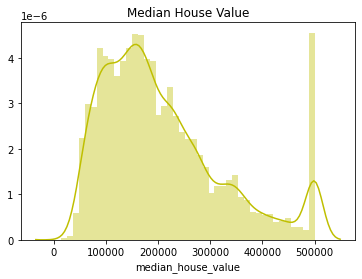

In [22]:
sns.distplot((y_train['median_house_value']), color = 'y', norm_hist = True)
plt.title('Median House Value')
plt.show()

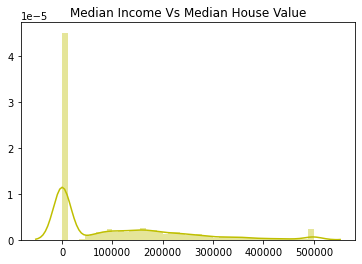

In [23]:
sns.distplot((X_train['median_income'], y_train['median_house_value']), color = 'y', norm_hist = True)
plt.title('Median Income Vs Median House Value')
plt.show()

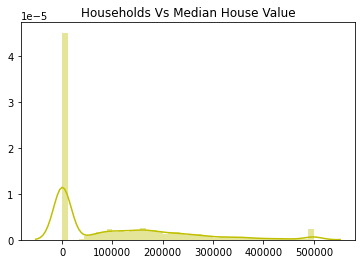

In [24]:
sns.distplot((X_train['households'], y_train['median_house_value']), color = 'y', norm_hist = True)
plt.title('Households Vs Median House Value')
plt.show()

In [25]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [26]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['total_bedrooms', 'households', 'latitude', 'population']

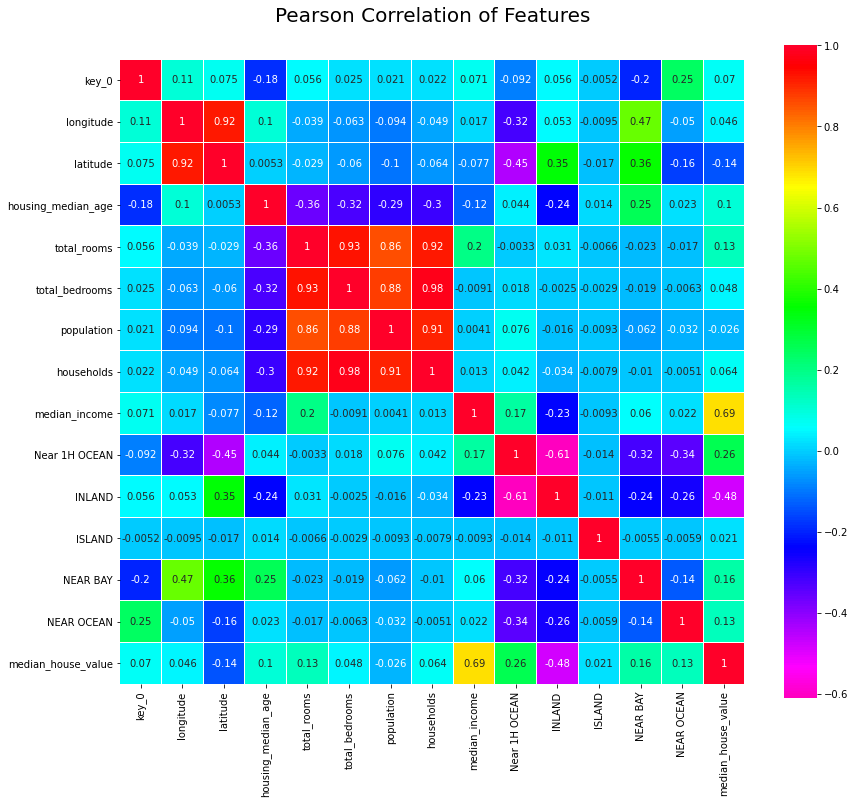

In [27]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [28]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [30]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [31]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append("DecisionTreeRegressor")
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [32]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [33]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append("RandomForestRegressor")
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [34]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [35]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [36]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [37]:
comparison_df = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
comparison_df

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,5.049680e+09,0.614649
1,DecisionTreeRegressor,5.233381e+09,0.600630
2,RandomForestRegressor,2.462185e+09,0.812106
3,XGB Regressor,2.695936e+09,0.794268


In [38]:
final_model = RandomForestRegressor()
final_model.fit(X_train, y_train)
predicted = final_model.predict(X_test)
Accuracy_Score = r2_score(y_test, predicted)
Accuracy_Score

0.8119667090417027